# TM10007 Assignment template

In [22]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/karinvangarderen/tm10007_project.git

In [0]:
# General packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# Classifiers
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier

# Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [0]:
# Some functions we will use
from sklearn.decomposition import PCA

def colorplot(clf, ax, x, y, h=100):
    '''
    Overlay the decision areas as colors in an axes.
    
    Input:
        clf: trained classifier
        ax: axis to overlay color mesh on
        x: feature on x-axis
        y: feature on y-axis
        h(optional): steps in the mesh
    '''
    # Create a meshgrid the size of the axis
    xstep = (x.max() - x.min() ) / 20.0
    ystep = (y.max() - y.min() ) / 20.0
    x_min, x_max = x.min() - xstep, x.max() + xstep
    y_min, y_max = y.min() - ystep, y.max() + ystep
    h = max((x_max - x_min, y_max - y_min))/h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if len(Z.shape) > 1:
        Z = Z[:, 1]
    
    # Put the result into a color plot
    cm = plt.cm.RdBu_r
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    del xx, yy, x_min, x_max, y_min, y_max, Z, cm



ERROR! Session/line number was not unique in database. History logging moved to new session 62
                     hf_energy  ...  vf_Frangi_inner_std_SR(1.0, 10.0)_SS2.0
ID                              ...                                         
0_002_S_0413_bl_0  5403.229408  ...                             4.207831e-10
0_002_S_0559_bl_0   922.459760  ...                             3.137258e-10
0_002_S_0619_bl_0  1674.765276  ...                             4.219847e-10
0_002_S_0685_bl_0  3443.797200  ...                             5.954654e-11
0_002_S_0816_bl_0   914.469846  ...                             4.174750e-10

[5 rows x 268 columns]
The number of samples: 855
The number of columns: 268
The number of features: 267
The number of found NaN is: 0
The number of found zeros is: 6215
Feature ranking:
1. feature 224 (0.037733)
2. feature 1 (0.035597)
3. feature 2 (0.029471)
4. feature 8 (0.027733)
5. feature 11 (0.024245)
6. feature 229 (0.023095)
7. feature 106 (0.022433)
8. 

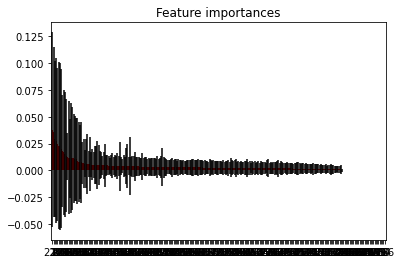

In [49]:
# Data loading functions. 
from adni.load_data import load_data 

data = load_data()
print(data.head())
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')
#data_missing = data.isnull()
#print(data_missing.index[data_missing == True])

# Creating vector of labels
data_no_label = data.drop(columns='label')
print(f'The number of features: {len(data_no_label.columns)}')
x = data_no_label.values
y = data['label'].values

# Check if there is missing data in our dataset
x_nan = np.isnan(x)
print(f'The number of found NaN is: {np.sum(x_nan)}')
x_zero = np.where(x == 0)[0]
print(f'The number of found zeros is: {len(x_zero)}')

# Split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3)

# Split data -> nog niet zeker welke te gebruiken
'''
# Of leave one out
loo = LeaveOneOut()
for train, test in loo.split(x):
  pass
'''

"""
Stukje van Eleen, doet bijna hetzelfde alleen heeft x nog kolomnamen
# Creating vector of labels
x = data.drop('label', axis=1)
y = data['label'].values
print(x)
"""

"""
# Perform PCA -> Niet zeker of we dit nou moeten doen, n_features moet waarschijnlijk iets anders zijn
n_features = len(data_no_label.columns) #ik denk dus dat dit alle features nu behoudt, maar snap nog niet helemaal hoe die PCA werkt
p = PCA(n_components=n_features)
p = p.fit(x)
x = p.transform(x)
"""

# Build a forest and compute the feature importances. Bedenken of dit op training set of volledige set moet
forest = RandomForestClassifier(n_estimators=100)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()